In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_m12_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        41.1164 (35.2789, 47.4623) (35.1737, 47.3514) 12.1777 (Jnode 202)\n',
 't_n104        24.0433 (18.8045, 33.2573) (18.1689, 32.1775) 14.0086 (Jnode 201)\n',
 't_n105        22.8326 (17.8877, 31.6294) (17.2320, 30.5340) 13.3020 (Jnode 200)\n',
 't_n106        20.2848 (15.9802, 28.0597) (15.3333, 26.9843) 11.6511 (Jnode 199)\n',
 't_n107        19.5437 (15.4236, 26.9980) (14.8313, 25.9827) 11.1515 (Jnode 198)\n',
 't_n108        18.2519 (14.4752, 25.1021) (13.9770, 24.2132) 10.2361 (Jnode 197)\n',
 't_n109         8.4485 ( 6.2972, 11.6214) ( 6.0881, 11.2941)  5.2060 (Jnode 196)\n',
 't_n110         8.3639 ( 6.2324, 11.5084) ( 5.9981, 11.1554)  5.1573 (Jnode 195)\n',
 't_n111         8.0787 ( 6.0165, 11.1171) ( 5.8298, 10.8096)  4.9798 (Jnode 194)\n',
 't_n112         7.7226 ( 5.7472, 10.6278) ( 5.5265, 10.2941)  4.7675 (Jnode 193)\n',
 't_n113         7.3983 ( 5.5037, 10.1868) ( 5.2716,  9.8489)  4.5773 (Jnode 192)\n',
 't_n114         5.3729 ( 3.9444,  7.4491) ( 3.7921,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[41.1164,
 24.0433,
 22.8326,
 20.2848,
 19.5437,
 18.2519,
 8.4485,
 8.3639,
 8.0787,
 7.7226,
 7.3983,
 5.3729,
 3.8051,
 2.8654,
 1.5951,
 5.7452,
 4.8325,
 7.7365,
 5.0146,
 7.3907,
 5.8696,
 4.7581,
 4.0706,
 7.1603,
 6.6814,
 1.9195,
 7.9446,
 7.086,
 5.4407,
 4.3092,
 4.9424,
 4.4339,
 3.6605,
 3.6449,
 16.8046,
 13.5272,
 18.4474,
 16.6844,
 15.2828,
 12.5428,
 6.8032,
 12.2897,
 10.5993,
 9.3759,
 7.8616,
 14.9852,
 13.6379,
 3.2773,
 1.4989,
 20.9193,
 19.4218,
 17.1746,
 16.7758,
 18.0613,
 11.8568,
 14.8836,
 11.5312,
 23.1614,
 21.421,
 19.1592,
 17.7443,
 15.068,
 10.2581,
 13.1355,
 18.5487,
 6.3169,
 18.6241,
 14.0519,
 13.3352,
 12.719,
 11.8587,
 10.8117,
 10.2427,
 9.7481,
 9.1962,
 8.1224,
 6.9707,
 5.7667,
 8.1966,
 7.6766,
 6.1099,
 6.7582,
 9.108,
 8.3301,
 7.5699,
 6.4937,
 4.4823,
 8.4677,
 7.5856,
 6.5857,
 10.1412,
 9.551,
 8.8171,
 7.7199,
 5.4907,
 8.879,
 5.4853,
 4.2785,
 1.6272,
 13.568,
 11.3678]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_m12_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[40.5541,
 27.1302,
 25.4394,
 22.4038,
 21.4218,
 19.3486,
 9.3309,
 9.2005,
 8.7221,
 8.2443,
 7.7702,
 5.6424,
 3.9995,
 2.927,
 1.704,
 5.9858,
 4.9174,
 8.2228,
 5.3228,
 7.768,
 6.1062,
 4.8463,
 4.3983,
 7.6187,
 7.0219,
 2.2338,
 8.6188,
 7.5746,
 5.7833,
 4.5488,
 5.2749,
 4.6326,
 3.7438,
 4.1251,
 17.7112,
 14.3671,
 19.9613,
 17.7966,
 16.0004,
 12.9465,
 7.1512,
 12.7683,
 10.7574,
 9.2439,
 7.5905,
 15.93,
 14.2666,
 3.9129,
 1.7832,
 22.6133,
 20.4387,
 17.6032,
 17.2479,
 19.2896,
 12.7667,
 15.6947,
 11.8718,
 25.9687,
 23.8314,
 20.995,
 19.1847,
 16.1925,
 11.4015,
 13.8763,
 20.4699,
 7.6433,
 20.7772,
 15.6438,
 14.5822,
 13.6907,
 12.6391,
 11.3094,
 10.5797,
 9.9481,
 9.1791,
 7.9114,
 6.6519,
 5.4849,
 8.1074,
 7.4794,
 5.8561,
 6.3869,
 9.1389,
 8.1723,
 7.2696,
 6.0947,
 4.2052,
 8.284,
 7.3112,
 6.2523,
 10.3697,
 9.5107,
 8.6326,
 7.3716,
 5.145,
 8.9236,
 6.057,
 4.6422,
 1.8464,
 14.9115,
 12.4401]

In [12]:
posterior_mean_iqtree

[41.1164,
 24.0433,
 22.8326,
 20.2848,
 19.5437,
 18.2519,
 8.4485,
 8.3639,
 8.0787,
 7.7226,
 7.3983,
 5.3729,
 3.8051,
 2.8654,
 1.5951,
 5.7452,
 4.8325,
 7.7365,
 5.0146,
 7.3907,
 5.8696,
 4.7581,
 4.0706,
 7.1603,
 6.6814,
 1.9195,
 7.9446,
 7.086,
 5.4407,
 4.3092,
 4.9424,
 4.4339,
 3.6605,
 3.6449,
 16.8046,
 13.5272,
 18.4474,
 16.6844,
 15.2828,
 12.5428,
 6.8032,
 12.2897,
 10.5993,
 9.3759,
 7.8616,
 14.9852,
 13.6379,
 3.2773,
 1.4989,
 20.9193,
 19.4218,
 17.1746,
 16.7758,
 18.0613,
 11.8568,
 14.8836,
 11.5312,
 23.1614,
 21.421,
 19.1592,
 17.7443,
 15.068,
 10.2581,
 13.1355,
 18.5487,
 6.3169,
 18.6241,
 14.0519,
 13.3352,
 12.719,
 11.8587,
 10.8117,
 10.2427,
 9.7481,
 9.1962,
 8.1224,
 6.9707,
 5.7667,
 8.1966,
 7.6766,
 6.1099,
 6.7582,
 9.108,
 8.3301,
 7.5699,
 6.4937,
 4.4823,
 8.4677,
 7.5856,
 6.5857,
 10.1412,
 9.551,
 8.8171,
 7.7199,
 5.4907,
 8.879,
 5.4853,
 4.2785,
 1.6272,
 13.568,
 11.3678]

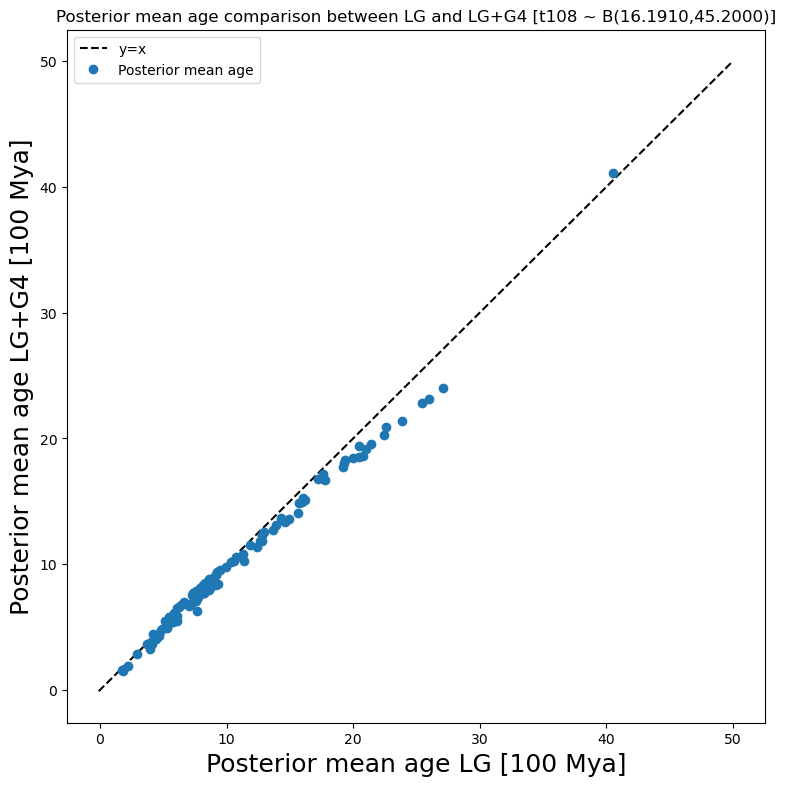

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t108 ~ B(16.1910,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_m12_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')